In [4]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    


In [5]:
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22ww = select_days('2022-07-01', '2022-12-31', 'wed', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-04-17', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-04-17', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-04-17', 'mon', 4)
f23ww = select_days('2023-01-01', '2023-04-19', 'wed', 1)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22ww, f23ww]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
test = ['2023-04-12','2023-04-19']


In [6]:
# helper -- others

def sharpe(profit):
    avg_rate = np.mean(profit)
    std_rate = np.std(profit)
    Sharpe_Ratio = (avg_rate * 52 -0.028397) / (std_rate * sqrt(52))
    return(Sharpe_Ratio)


def down(profit):
    return_list = [i+1 for i in profit]
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    return drawdown_rate


def vola(profit):
    log_return_list = [log(i+1) for i in profit]
    Volatility = std(log_return_list) / sqrt(5)
    annualVolatility = Volatility * sqrt(252) 
    return annualVolatility


def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['cat1'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    
def ipo(codes, dt):
    exist = []
    for code in codes:
        if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= (datetime.datetime.strptime(dt, '%Y-%m-%d') + datetime.timedelta(days=-180)):
            exist.append(code)
             
    return exist
    
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            exist.append(code)
            
    return exist

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]
            
def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
    elif len(fcd) == 1:
        return ipo(codes, dt)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low)
    
    
    return [i[0] for i in low]
        
    
idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

In [7]:
# plot

def plot_profit(days, profit, mk_one, market = DTBS['C'], tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], profit, linestyle='dashdot',label='策略收益率')
    
    i_x = [days[1], days[-1]]

#     market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
#     i_y = [0, market_gain]
#     plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')
    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.ylabel('收益率/%')
    plt.ylabel("increase per year/%")
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

# statistics

def win_stat(res, mk):
    print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    mksum = 0    
    for i in range(len(res)):
        if res[i] >= mk[i]:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += res[i]
        mksum += mk[i]
        if (count + 1) % 4 == 0:
            if summ >= mksum:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            mksum = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
    print("Weekly win rate & details", win_rate, ", ", wins)
    print("Monthly win rate & details", winm_rate,", ", winsm)

    

In [32]:
# calculate
def cumulative_profit(days, grp_cd, flt_cd, rk_cd):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            for cd in grp[1]:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, cd)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                for rk in rk_cd:
                    select = rank(select, days[i], rk[0], rk[1], rk[2])                  
                for cd in select:
                    candidate.append(cd)
                    
                
                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            for rk in rk_cd:
                select = rank(select, days[i], rk[0], rk[1], rk[2])    
#             if dl > 0:
#                 select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
        if avoid(days[i]):
            candidate = []
#         print(days[i], len(candidate))
        all_select.append(candidate)
#         print(days[i], candidate)
        
#         dl = []
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dl'])
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dp'])
            
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['bl'])
#         print(days[i], candidate, dl)
        dl = []
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
            if len(all_select[i-1]) == 0:
                profit = 0
                print("short position in", days[i-1])
            else:
                profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)


    return cm_profit, one_profit    

In [44]:
def avoid(dt):
    return False
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] >= 120 and DTBS['A'][code][dt]['dp'] <= 130:
                c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                
    m = np.median(c)
    
    return m > 160

    

ytm>-1市值<7换手2-10双低100-130前5(空仓)2022年起每半年至今
20.2406%
3.154%
7.5481%


<Figure size 8000x6000 with 0 Axes>

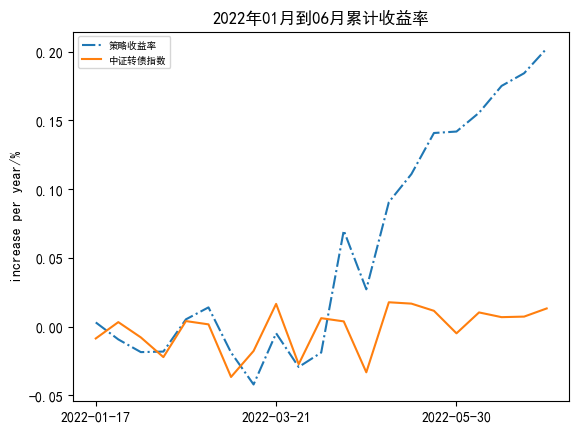

<Figure size 8000x6000 with 0 Axes>

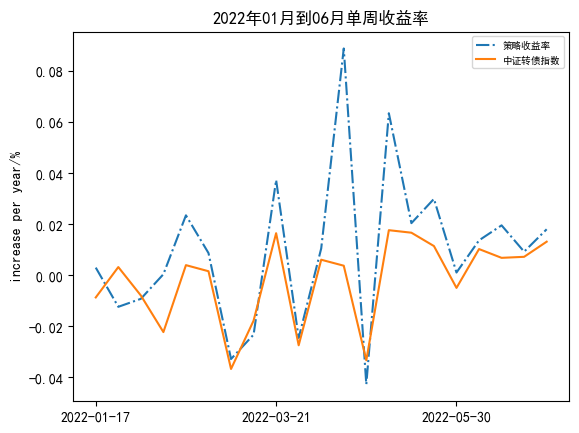

<Figure size 8000x6000 with 0 Axes>

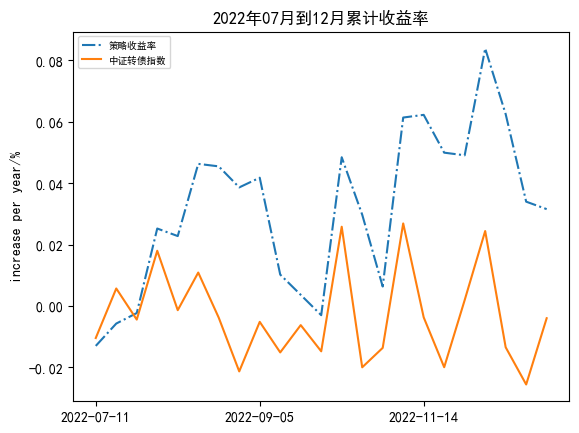

<Figure size 8000x6000 with 0 Axes>

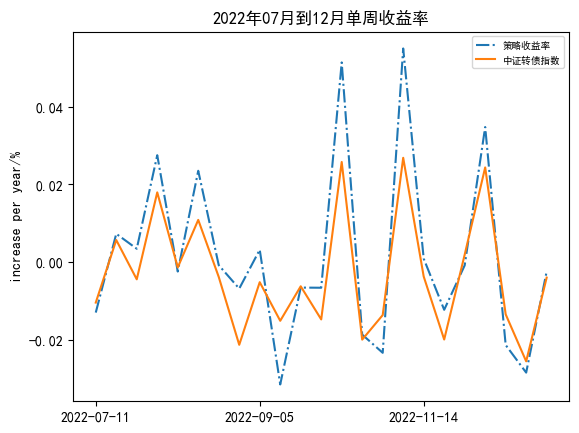

<Figure size 8000x6000 with 0 Axes>

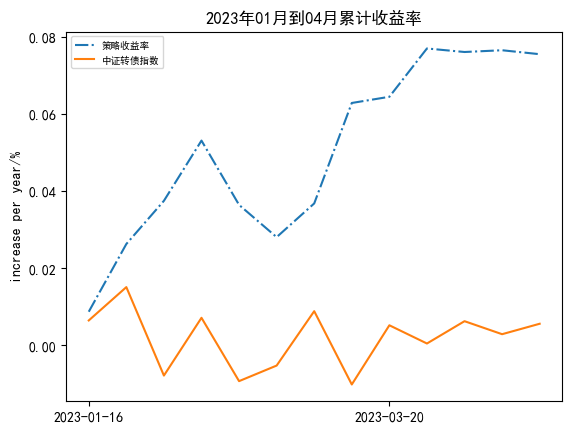

<Figure size 8000x6000 with 0 Axes>

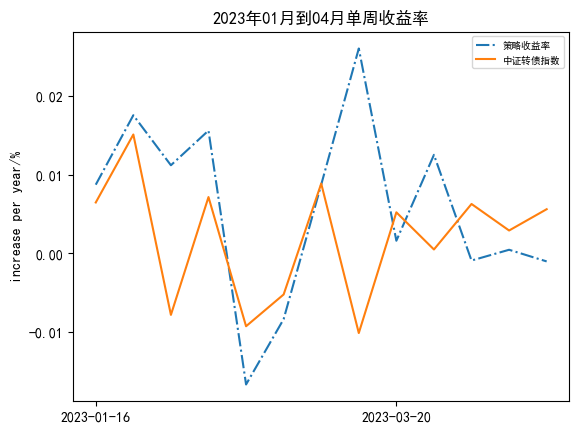

In [45]:




prlst = [[110,120], [120,130]]
prlst = [[110,120], [120,130], [130,140]]
# grp_cd = [['id', idlst], ['pr', prlst]]
# grp_cd = [['id', idlst]]
# grp_cd = [['pr', prlst]]
grp_cd = []
fil_cd = []
fil_cd = [['bl',0.3,7]]
fil_cd = []
dl = 0



tts = ['2020年上半年收益率',  '2020年下半年收益率', '2021年上半年收益率', '2021年下半年收益率','2022年上半年收益率', '2022年下半年收益率','2023年上半年收益率']



fil_cd = [['dp', 100, 9999], ['ytm', 1, 1000], ['trt', 2, 10]]







tf = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
tm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
twy = [a20wm, a21wm, a22wm, f23wm]
tw = [f22wm, s22wm, f23wm]
acp = []
grp_cd = []
fil_cd = []
# res1 = []
res2 = []
mk = []
print("ytm>-1市值<7换手2-10双低100-130前5(空仓)2022年起每半年至今")
for i in range(3):
#     grp_cd = [['id', idts[i]], ['pr', prlst]]
    


    prlst = [[110,120], [120,130], [130,140]]
    prlst = [[110,120], [120,130]]
    prlst = [[110,130]]   

    grp_cd = [['pr', prlst]]
    grp_cd = []
#     fil_cd = [['dp', 100, 9999],['ytm', 0.5, 9999], ['bl', 0.3, 7], ['trt', 2, 10]]

    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]
    fil_cd = [['dp',100,130],['ytm', 0.5, 999], ['bl', 0, 7], ['trt',2,10]]
    fil_cd = [['dp',100,130],['bl', 0, 3]]
    fil_cd = [['cx'],['bl', 0, 7], ['dp',100,130]]
    fil_cd = [['dp',110,130]]
    fil_cd = [['dp',100,130],['ytm', -1, 999], ['bl', 0, 7], ['trt',2,10]]
#     rk_cd = [['dl', 5, 'a']]
#     rk_cd = [['lp', 5, 'a']]
    rk_cd = [['ytm', 5, 'd']]
    rk_cd = [['dl', 5, 'a']]
    
    mk_one = []
    
    time = tw[i].copy()
    for k in range(1,len(time)):
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
    plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
    plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    
    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])
#     print(len(acp), i, acp)
    print(str(round(acp[i]*100,4)) + '%')
#     with open('log.txt','a') as f:
#         print(cm_profit[-1], file=f)

# for i in range(7):
#     print(str(round(acp[i]*100,4)) + '%')

short position in 2022-05-23
18.9756%
short position in 2022-08-08
8.7933%
short position in 2023-01-30
short position in 2023-02-06
short position in 2023-02-13
8.3534%


<Figure size 8000x6000 with 0 Axes>

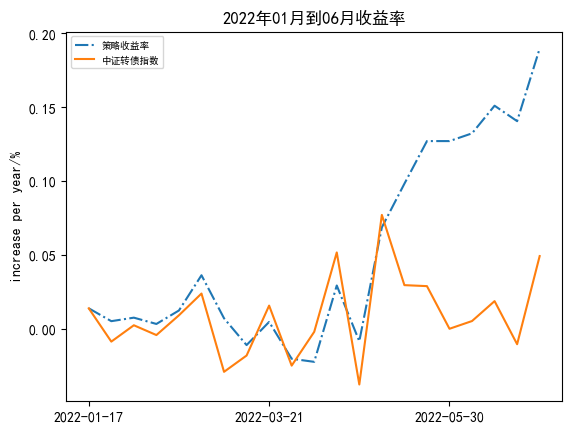

<Figure size 8000x6000 with 0 Axes>

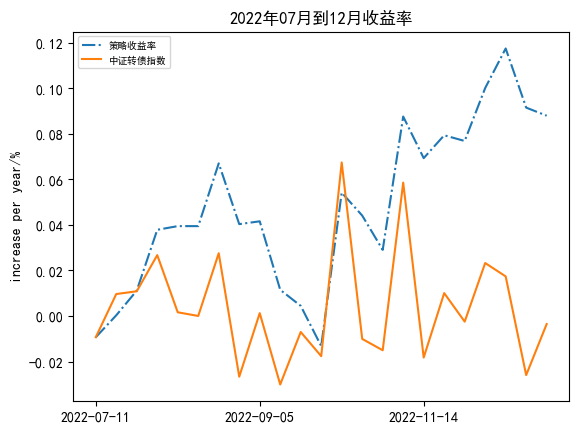

<Figure size 8000x6000 with 0 Axes>

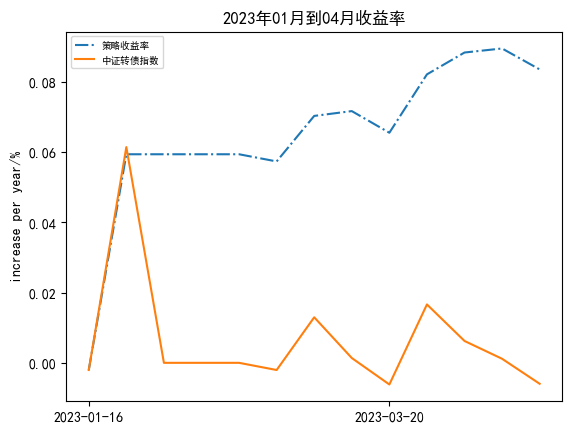

In [35]:
ttt1 = select_days('2020-01-21', '2022-04-25', 'mon', 1)
ttt2 = select_days('2022-04-20', '2023-04-25', 'mon', 1)
ttt = [ttt1, ttt2]

tw = [f22wm, s22wm, f23wm]
tick_spacing = 8

acp = []
grp_cd = []
fil_cd = []
# res1 = []
res2 = []
mk = []
for i in range(3):
#     grp_cd = [['id', idts[i]], ['pr', prlst]]
    


    prlst = [[110,120], [120,130], [130,140]]
    prlst = [[110,120], [120,130]]
    prlst = [[110,130]]   

    grp_cd = [['pr', prlst]]
    grp_cd = []
#     fil_cd = [['dp', 100, 9999],['ytm', 0.5, 9999], ['bl', 0.3, 7], ['trt', 2, 10]]



    fil_cd = [['dp',100,130],['bl', 0, 3]]


    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]
    fil_cd = [['dp',100,130],['ytm', 0.5, 999], ['bl', 0, 7], ['trt',2,10]]
    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]
#     rk_cd = [['dl', 5, 'a']]
#     rk_cd = [['lp', 5, 'a']]




    rk_cd = [['ytm', 5, 'd']]
    rk_cd = [['lp', 5, 'a']]
#     rk_cd = [['dl', 5, 'a']]
    
    mk_one = []
    mk_sum = []
    time = tw[i].copy()
    mk_s = 0
    for k in range(1,len(time)):
       
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        mk_s += (DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]])

        mk_sum.append(mk_s)
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
    plot_profit(time, cm_profit, one_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'收益率')
    
    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])
    print(str(round(acp[i]*100,4)) + '%')
#     print('-----------------------------------------')
#     print(cm_profit[-1])
#     print(win_stat(one_profit, mk_one))
#     print(max(one_profit), time[one_profit.index(max(one_profit))])
#     print(min(one_profit), time[one_profit.index(min(one_profit))])
#     print(sharpe(one_profit))
#     print(down(one_profit))
#     print(vola(one_profit))
#     with open('log.txt','a') as f:
#         print(cm_profit[-1], file=f)



In [23]:
print(cm_profit[-1])
print(one_profit)
print(mk_sum[-1])
print(mk_one)

0.5506892003953165
[0.2368927260216872, -0.01527174546287337, 0.03259140464272413, 0.0037018608816799096, 0.009109598752303874, -0.0025531900672886225, 0.022462646385785476, -0.0033911492725382793, 0.0297235023041476, 0.0010893246187363309, -0.014213410648745572, 0.026647256791641535, 0.018360253667744804, 0.00016497294443714984, -0.016526841073609938, 0.019763322604310577, 0.016815295758855976, -0.00626322028223369, -0.03203284749145295, 0.018167177117879386, -0.010342010982523402, 0.006585878149803483, -0.0009111731984191107, 0.07432398509905519, 0.06479540675780918, 0.0013651231314032262, 9.167703490282238e-05, 0.004867969461371481, 0.010662565011666226, -0.007038968054543743, 4.353680069020931e-05, 0.03172287822997307, 0.0138409721762746, -0.008696872836874718, 0.002372456955606225, -0.004260332112253457, 0.009125275293585125, 0.023850602409638523, -0.029151356023311908, -0.01812712324791761, 0.015684575098847367, -0.024951726055202097, -0.0020773907801696903, 0.0516763138827141]
0

In [50]:
win_stat(one_profit, mk_one)

Max profit 0.022212717767923114 , Max loss -0.013504140626564467
Weekly win rate & details 0.5384615384615384 ,  [True, True, False, True, False, False, True, True, False, True, False, True, False]
Monthly win rate & details 0.3333333333333333 ,  [False, True, False]


In [22]:
print(max(one_profit), ttt1[one_profit.index(max(one_profit))])
print(min(one_profit), ttt1[one_profit.index(min(one_profit))])

0.2368927260216872 2021-04-26
-0.03203284749145295 2021-09-13


In [24]:
print(sharpe(one_profit))
print(down(one_profit))
print(vola(one_profit))

2.1285657281111003
0.21742028864387147
0.26530404757051834


In [54]:
def plot_profit_compare(days, res1, res2, mk_one, tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], res1, linestyle='dashed',label='高ytm策略单周表现')
    plt.plot(days[1:], res2, linestyle='dotted',label='双低小市值策略单周表现')    



    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数单周表现')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('收益率/%')
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

<Figure size 8000x6000 with 0 Axes>

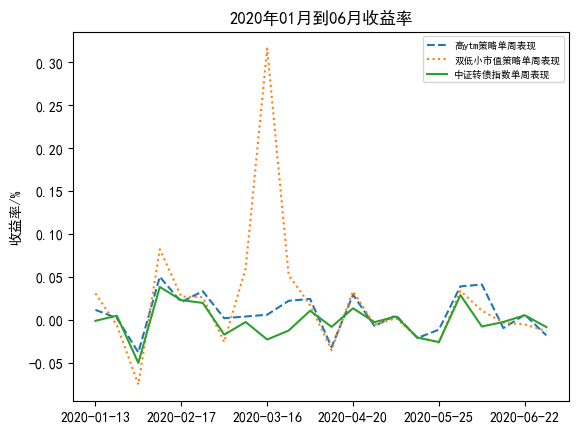

<Figure size 8000x6000 with 0 Axes>

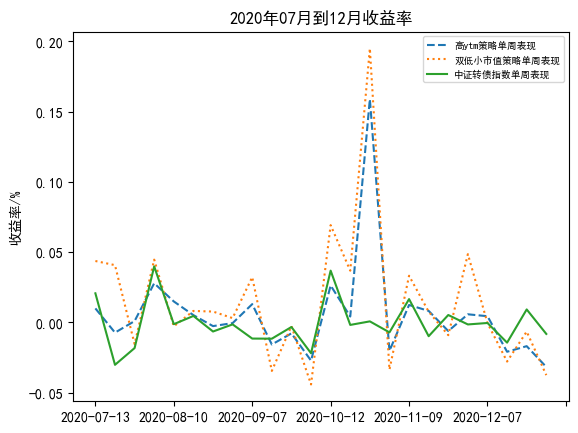

<Figure size 8000x6000 with 0 Axes>

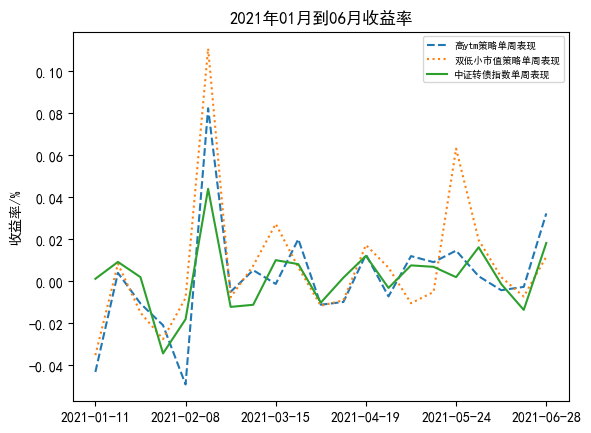

<Figure size 8000x6000 with 0 Axes>

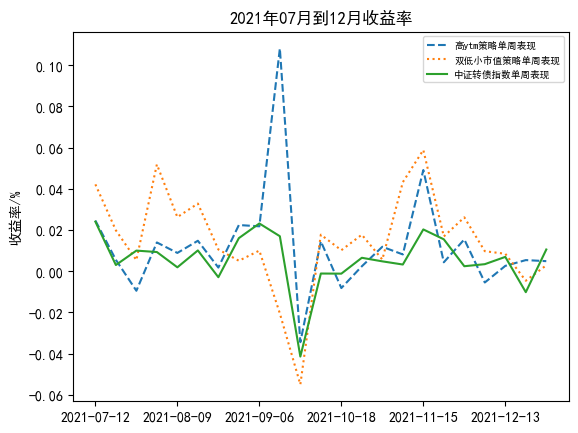

<Figure size 8000x6000 with 0 Axes>

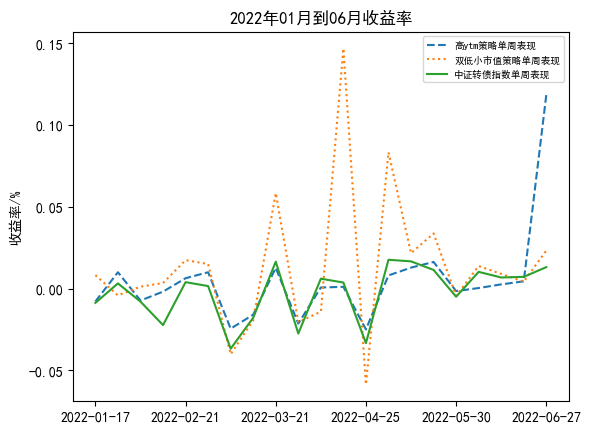

<Figure size 8000x6000 with 0 Axes>

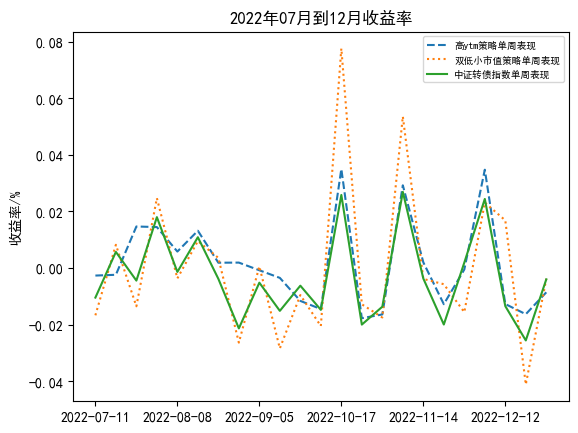

<Figure size 8000x6000 with 0 Axes>

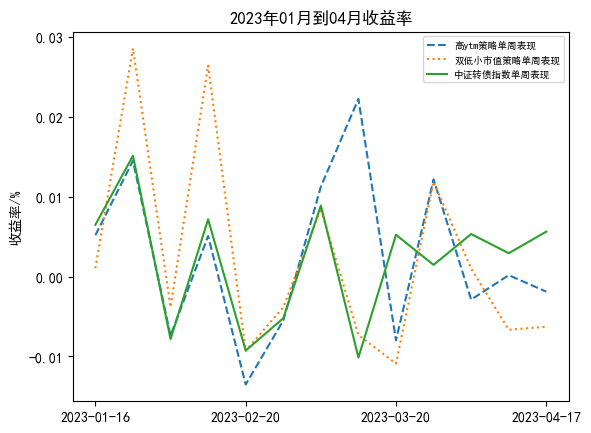

In [36]:
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
for i in range(7):
    time = tw[i].copy()
    plot_profit_compare(time, res1[i], res2[i], mk[i], tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'收益率')
    


In [44]:
sel = 0
al = 0
dt = '2023-04-19'
dt = '2017-12-29'
for code in DTBS['A'].keys():
    if DTBS['A'][code][dt]['ia'] == 1:
        if DTBS['B'][code]['cat1'] == '银行(2021)':
            sel += DTBS['A'][code][dt]['bl']
        elif DTBS['B'][code]['cat1'] == '非银金融(2021)':
            sel += DTBS['A'][code][dt]['bl']
        al += DTBS['A'][code][dt]['bl']
print(sel)
print(al)
print(str(round(sel/al * 100,2)) + '%')

369.9987
854.4572879999998
43.3%


In [9]:
import os,random,time
f=open(os.getcwd()+r"/menu.txt","r",encoding="utf-8")
a=f.readlines()
li=[]
for aa in a:
    li.append(aa.strip())
print("程序正在从列表"+str(li)+"中进行随机选择，请稍后")
time.sleep(1)
print("选择结果为："+random.choice(li))
os.system("pause")

程序正在从列表['老乡鸡', '自选']中进行随机选择，请稍后
选择结果为：自选


0

In [2]:
a = [1,2]
b = [1,3]

In [3]:
a * b

TypeError: can't multiply sequence by non-int of type 'list'

In [80]:
codes = list(DTBS['A'].keys())
codes = rank(codes, '2023-04-10', 'ytm', num = -1)
for code in codes:
    print(code, DTBS['B'][code]['cn'],"YTM", DTBS['A'][code][ '2023-04-10']['ytm'])

In 2023-04-10 471 of 757 is selected
128100.SZ 搜特转债 YTM 13.96
128014.SZ 永东转债 YTM 10.11
113578.SH 全筑转债 YTM 8.12
128114.SZ 正邦转债 YTM 6.85
110072.SH 广汇转债 YTM 5.53
128085.SZ 鸿达转债 YTM 5.01
113589.SH 天创转债 YTM 4.81
123049.SZ 维尔转债 YTM 4.5
127047.SZ 帝欧转债 YTM 4.46
113596.SH 城地转债 YTM 4.37
128138.SZ 侨银转债 YTM 4.1
113576.SH 起步转债 YTM 4.01
128062.SZ 亚药转债 YTM 3.91
113056.SH 重银转债 YTM 3.55
113037.SH 紫银转债 YTM 3.46
113042.SH 上银转债 YTM 3.39
128129.SZ 青农转债 YTM 3.35
110059.SH 浦发转债 YTM 3.29
128108.SZ 蓝帆转债 YTM 3.26
123126.SZ 瑞丰转债 YTM 3.14
123128.SZ 首华转债 YTM 2.79
113584.SH 家悦转债 YTM 2.78
113065.SH 齐鲁转债 YTM 2.77
113601.SH 塞力转债 YTM 2.71
128127.SZ 文科转债 YTM 2.66
113624.SH 正川转债 YTM 2.64
123056.SZ 雪榕转债 YTM 2.58
113608.SH 威派转债 YTM 2.56
127034.SZ 绿茵转债 YTM 2.55
113052.SH 兴业转债 YTM 2.55
123076.SZ 强力转债 YTM 2.49
123096.SZ 思创转债 YTM 2.45
113033.SH 利群转债 YTM 2.25
128105.SZ 长集转债 YTM 2.25
127061.SZ 美锦转债 YTM 2.16
113610.SH 灵康转债 YTM 2.13
123106.SZ 正丹转债 YTM 2.11
128125.SZ 华阳转债 YTM 2.09
128116.SZ 瑞达转债 YTM 2.02
118000.SH 嘉元转债 YTM 1.91
113

In [35]:
dt = DTBS['D']['day'][-1]

In [6]:
DTBS['A'].keys()
    

dict_keys(['110088.SH', '113545.SH', '113631.SH', '123128.SZ', '123156.SZ', '127027.SZ', '127061.SZ', '110047.SH', '110063.SH', '110070.SH', '110087.SH', '110089.SH', '110092.SH', '111001.SH', '111002.SH', '111003.SH', '111007.SH', '111012.SH', '113025.SH', '113027.SH', '113046.SH', '113047.SH', '113058.SH', '113059.SH', '113064.SH', '113534.SH', '113535.SH', '113566.SH', '113591.SH', '113600.SH', '113615.SH', '113621.SH', '113623.SH', '113632.SH', '113636.SH', '113638.SH', '113640.SH', '113641.SH', '113649.SH', '113650.SH', '113653.SH', '113657.SH', '113663.SH', '118000.SH', '118005.SH', '118006.SH', '118008.SH', '118010.SH', '118018.SH', '118020.SH', '118022.SH', '118023.SH', '118028.SH', '118029.SH', '123012.SZ', '123013.SZ', '123031.SZ', '123046.SZ', '123052.SZ', '123057.SZ', '123076.SZ', '123078.SZ', '123085.SZ', '123091.SZ', '123106.SZ', '123118.SZ', '123124.SZ', '123126.SZ', '123129.SZ', '123144.SZ', '123152.SZ', '123158.SZ', '123165.SZ', '123166.SZ', '123168.SZ', '123169.SZ', '